<a href="https://colab.research.google.com/github/sakamototaisei/python_pf_colabo/blob/main/PF_%E7%A7%BB%E5%8B%95%E5%B9%B3%E5%9D%87%E7%B7%9A_MACD_RSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **株価情報の取得**

In [ ]:
from pandas_datareader import data
import pandas as pd 
import numpy as np
 
# 株価データを取得
df = data.DataReader('9984.JP', 'stooq')
 
# 日付の古い順に並び替え
df.sort_index(inplace=True)

# 最新50日分のデータを抽出
df = df.tail(50)

# 先頭の5行を表示
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2023-01-18,5951.0,6131.0,5936.0,6099.0,10159900.0
2023-01-19,5999.0,6009.0,5851.0,5875.0,9958400.0
2023-01-20,5891.0,5895.0,5817.0,5882.0,6022500.0
2023-01-23,5982.0,6008.0,5937.0,5984.0,7436200.0
2023-01-24,6055.0,6222.0,6046.0,6187.0,13148800.0


# **移動平均線**

終値で計算するので、Close列を指定してrolling関数を適用します。

そして引数のwindowで期間を指定します。

最後に平均値を指定するmean()をつければおしまいです。

ここをmax()とかmin()にすると、その期間のおける最高値あるいは最安値を計算することもできます。

In [ ]:
df["SMA5"] = df["Close"].rolling(window=5).mean()
df["SMA25"] = df["Close"].rolling(window=25).mean()

In [ ]:
df.head(10)

,Open,High,Low,Close,Volume,SMA5,SMA25
Date,,,,,,,
2023-01-18,5951.0,6131.0,5936.0,6099.0,10159900.0,NaN,NaN
2023-01-19,5999.0,6009.0,5851.0,5875.0,9958400.0,NaN,NaN
2023-01-20,5891.0,5895.0,5817.0,5882.0,6022500.0,NaN,NaN
2023-01-23,5982.0,6008.0,5937.0,5984.0,7436200.0,NaN,NaN
2023-01-24,6055.0,6222.0,6046.0,6187.0,13148800.0,6005.4,NaN
2023-01-25,6130.0,6218.0,6125.0,6183.0,7476100.0,6022.2,NaN
2023-01-26,6218.0,6228.0,6163.0,6198.0,6497100.0,6086.8,NaN
2023-01-27,6257.0,6280.0,6182.0,6191.0,6181200.0,6148.6,NaN
2023-01-30,6258.0,6272.0,6145.0,6164.0,7180300.0,6184.6,NaN


In [ ]:
pip install mpl_finance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


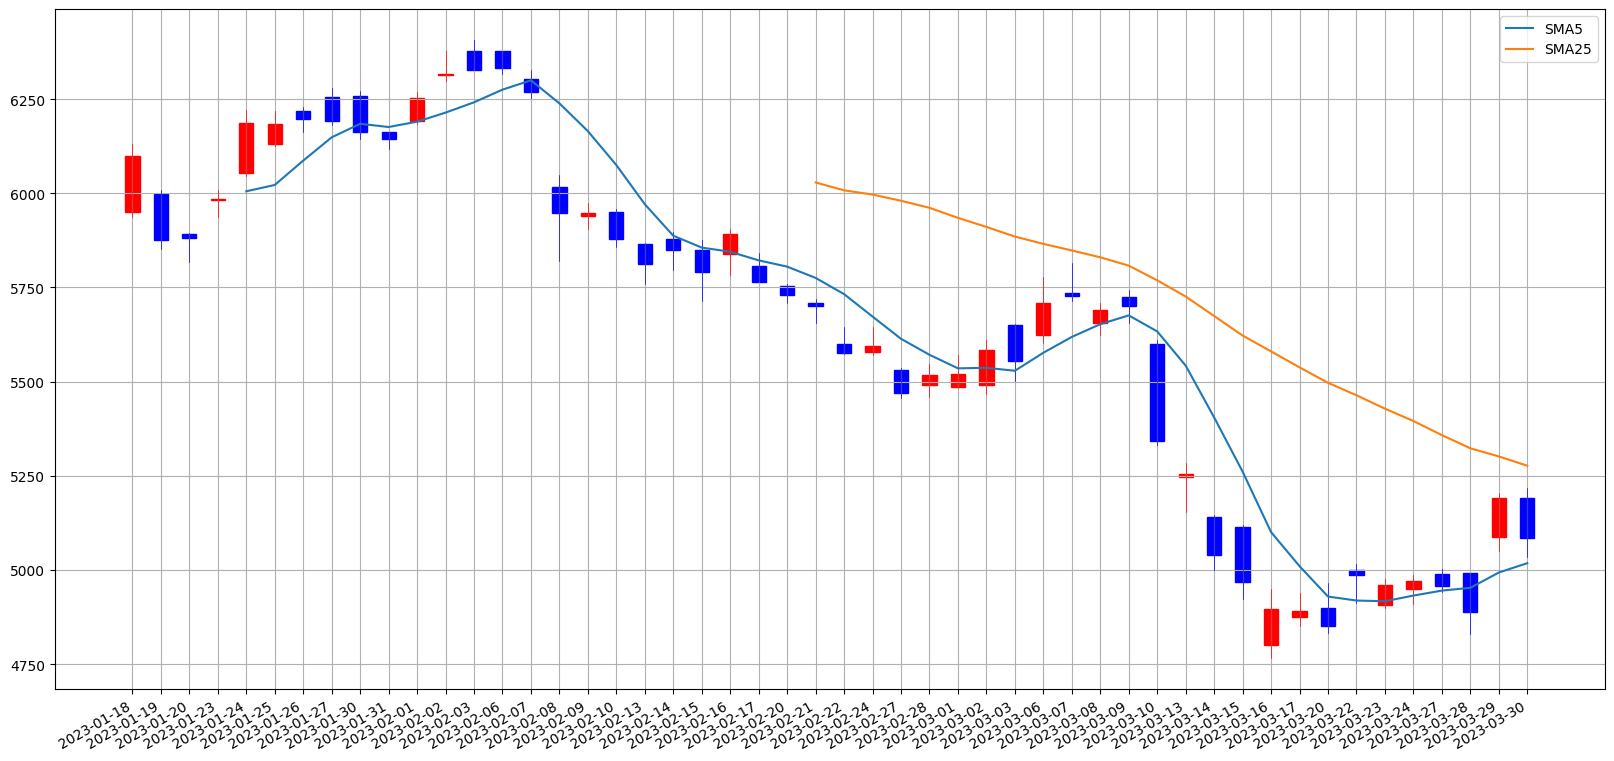

In [ ]:
import mpl_finance
import matplotlib.pyplot as plt
%matplotlib inline
 

df.insert(0, 'index', [x for x in range(len(df))])
 
# チャート定義
fig, ax = plt.subplots(figsize=(20, 10))
 
# ローソク足チャートをプロット
mpl_finance.candlestick_ohlc(ax, df.values, width=0.5, colorup='r', colordown='b')
 
# 移動平均線をプロット
ax.plot(df["index"], df["SMA5"], label="SMA5")
ax.plot(df["index"], df["SMA25"], label="SMA25")
 
# X軸を調整
plt.xticks([x for x in range(len(df))], [x.strftime('%Y-%m-%d') for x in df.index])
fig.autofmt_xdate()
 
# 凡例表示
plt.legend()
 
# グリッド表示
plt.grid()
 
# グラフを表示
plt.show()

In [ ]:
df.head()

,index,Open,High,Low,Close,Volume,SMA5,SMA25
Date,,,,,,,,
2023-01-18,0,5951.0,6131.0,5936.0,6099.0,10159900.0,NaN,NaN
2023-01-19,1,5999.0,6009.0,5851.0,5875.0,9958400.0,NaN,NaN
2023-01-20,2,5891.0,5895.0,5817.0,5882.0,6022500.0,NaN,NaN
2023-01-23,3,5982.0,6008.0,5937.0,5984.0,7436200.0,NaN,NaN
2023-01-24,4,6055.0,6222.0,6046.0,6187.0,13148800.0,6005.4,NaN


# **MACD**

MACDは2種類の指数平滑移動平均（通常は12と26）の差分を計算して、さらにその差分の移動平均（通常は9）を求めることで算出できます。

MACDはトレンド系とオシレーター系の両方の特徴を併せ持つ人気のテクニカル分析手法です。

ewa関数を使うと指数平滑移動平均を一瞬で計算できる

In [ ]:
def macd(df):
    FastEMA_period = 12  # 短期EMAの期間
    SlowEMA_period = 26  # 長期EMAの期間
    SignalSMA_period = 9  # SMAを取る期間
    df["MACD"] = df["Close"].ewm(span=FastEMA_period).mean() - df["Close"].ewm(span=SlowEMA_period).mean()
    df["Signal"] = df["MACD"].rolling(SignalSMA_period).mean()
    return df
 
# MACDを計算する
df = macd(df)

In [ ]:
df.head(10)

,index,Open,High,Low,Close,Volume,SMA5,SMA25,MACD,Signal
Date,,,,,,,,,,
2023-01-18,0,5951.0,6131.0,5936.0,6099.0,10159900.0,NaN,NaN,0.000000,NaN
2023-01-19,1,5999.0,6009.0,5851.0,5875.0,9958400.0,NaN,NaN,-5.025641,NaN
2023-01-20,2,5891.0,5895.0,5817.0,5882.0,6022500.0,NaN,NaN,-6.186595,NaN
2023-01-23,3,5982.0,6008.0,5937.0,5984.0,7436200.0,NaN,NaN,-2.880330,NaN
2023-01-24,4,6055.0,6222.0,6046.0,6187.0,13148800.0,6005.4,NaN,7.054720,NaN
2023-01-25,5,6130.0,6218.0,6125.0,6183.0,7476100.0,6022.2,NaN,12.723385,NaN
2023-01-26,6,6218.0,6228.0,6163.0,6198.0,6497100.0,6086.8,NaN,16.819124,NaN
2023-01-27,7,6257.0,6280.0,6182.0,6191.0,6181200.0,6148.6,NaN,18.962095,NaN
2023-01-30,8,6258.0,6272.0,6145.0,6164.0,7180300.0,6184.6,NaN,18.817978,6.698304


subplots関数を使うとグラフを分割して複数の種類のグラフをまとめて表示することが可能になります。

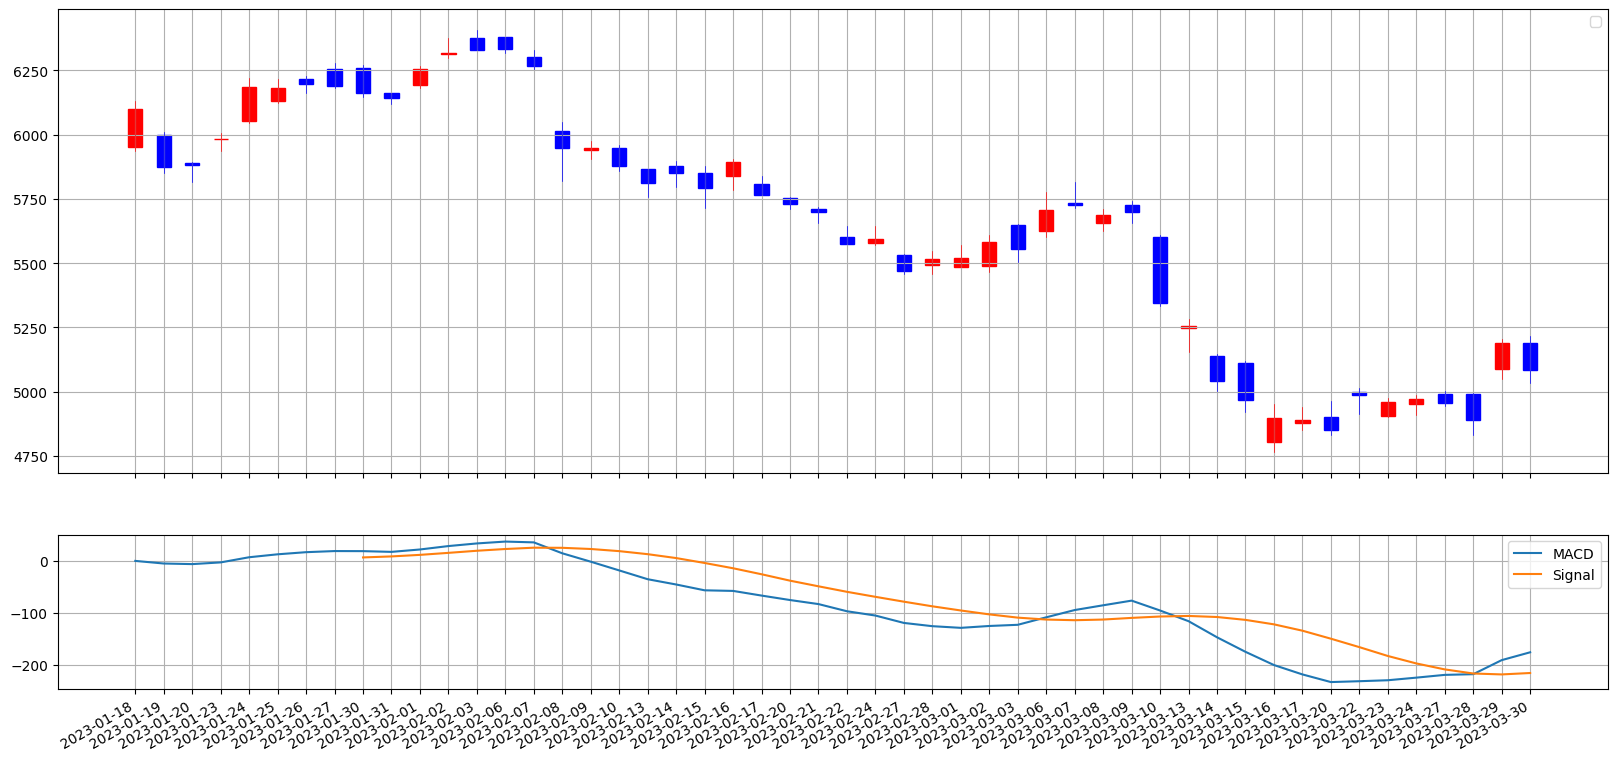

In [ ]:
import mpl_finance
import matplotlib.pyplot as plt
%matplotlib inline
 
 
# チャート定義
fig, ax = plt.subplots(2, figsize=(20, 10), sharex=True, gridspec_kw={'height_ratios': [3, 1]})
 
# ローソク足チャートをプロット
mpl_finance.candlestick_ohlc(ax[0], df.values, width=0.5, colorup='r', colordown='b')
 
# MACDをプロット
ax[1].plot(df["index"], df["MACD"], label="MACD")
ax[1].plot(df["index"], df["Signal"], label="Signal")
 
# X軸を調整
plt.xticks([x for x in range(len(df))], [x.strftime('%Y-%m-%d') for x in df.index])
fig.autofmt_xdate()
 
# 凡例表示, グリッド表示
for a in ax:
    a.legend()
    a.grid()
 
# グラフを表示
plt.show()

# **RSI**

RSIはオシレーター系の代表的なテクニカル分析手法で、株価の上がりすぎや下がりすぎを判断するために使われます。

一般的に期間は14が用いられ、この期間で平均上がり幅と平均値下がり幅の比で算出されます。

0〜100の数値で示され、50を超えると上昇平均の方が大きいことを意味します。

一般的に70で買われすぎ、30で売られすぎと判断され、逆張りに利用されることが多いです。

In [ ]:
def rsi(df):
    # 前日との差分を計算
    df_diff = df["Close"].diff(1)
 
    # 計算用のDataFrameを定義
    df_up, df_down = df_diff.copy(), df_diff.copy()
    
    # df_upはマイナス値を0に変換
    # df_downはプラス値を0に変換して正負反転
    df_up[df_up < 0] = 0
    df_down[df_down > 0] = 0
    df_down = df_down * -1
    
    # 期間14でそれぞれの平均を算出
    df_up_sma14 = df_up.rolling(window=14, center=False).mean()
    df_down_sma14 = df_down.rolling(window=14, center=False).mean()
 
    # RSIを算出
    df["RSI"] = 100.0 * (df_up_sma14 / (df_up_sma14 + df_down_sma14))
 
    return df
 
# RSIを算出
df = rsi(df)

まずは前日との差分を計算してdf_diffに格納します。

これをcopyしてdf_upとdf_downを定義します。

それぞれ、値上がりと値下がりの平均を計算するために使います。

df_upはマイナス値を0に変換、df_downはプラス値を0に変換します。

さらにその後はdf_downの数値の正負を反転するために-1をかけます。

あとは平均値を計算して比を算出すれば完成です。

In [ ]:
df.head(20)

,index,Open,High,Low,Close,Volume,SMA5,SMA25,MACD,Signal,RSI
Date,,,,,,,,,,,
2023-01-18,0,5951.0,6131.0,5936.0,6099.0,10159900.0,NaN,NaN,0.000000,NaN,NaN
2023-01-19,1,5999.0,6009.0,5851.0,5875.0,9958400.0,NaN,NaN,-5.025641,NaN,NaN
2023-01-20,2,5891.0,5895.0,5817.0,5882.0,6022500.0,NaN,NaN,-6.186595,NaN,NaN
2023-01-23,3,5982.0,6008.0,5937.0,5984.0,7436200.0,NaN,NaN,-2.880330,NaN,NaN
2023-01-24,4,6055.0,6222.0,6046.0,6187.0,13148800.0,6005.4,NaN,7.054720,NaN,NaN
2023-01-25,5,6130.0,6218.0,6125.0,6183.0,7476100.0,6022.2,NaN,12.723385,NaN,NaN
2023-01-26,6,6218.0,6228.0,6163.0,6198.0,6497100.0,6086.8,NaN,16.819124,NaN,NaN
2023-01-27,7,6257.0,6280.0,6182.0,6191.0,6181200.0,6148.6,NaN,18.962095,NaN,NaN
2023-01-30,8,6258.0,6272.0,6145.0,6164.0,7180300.0,6184.6,NaN,18.817978,6.698304,NaN


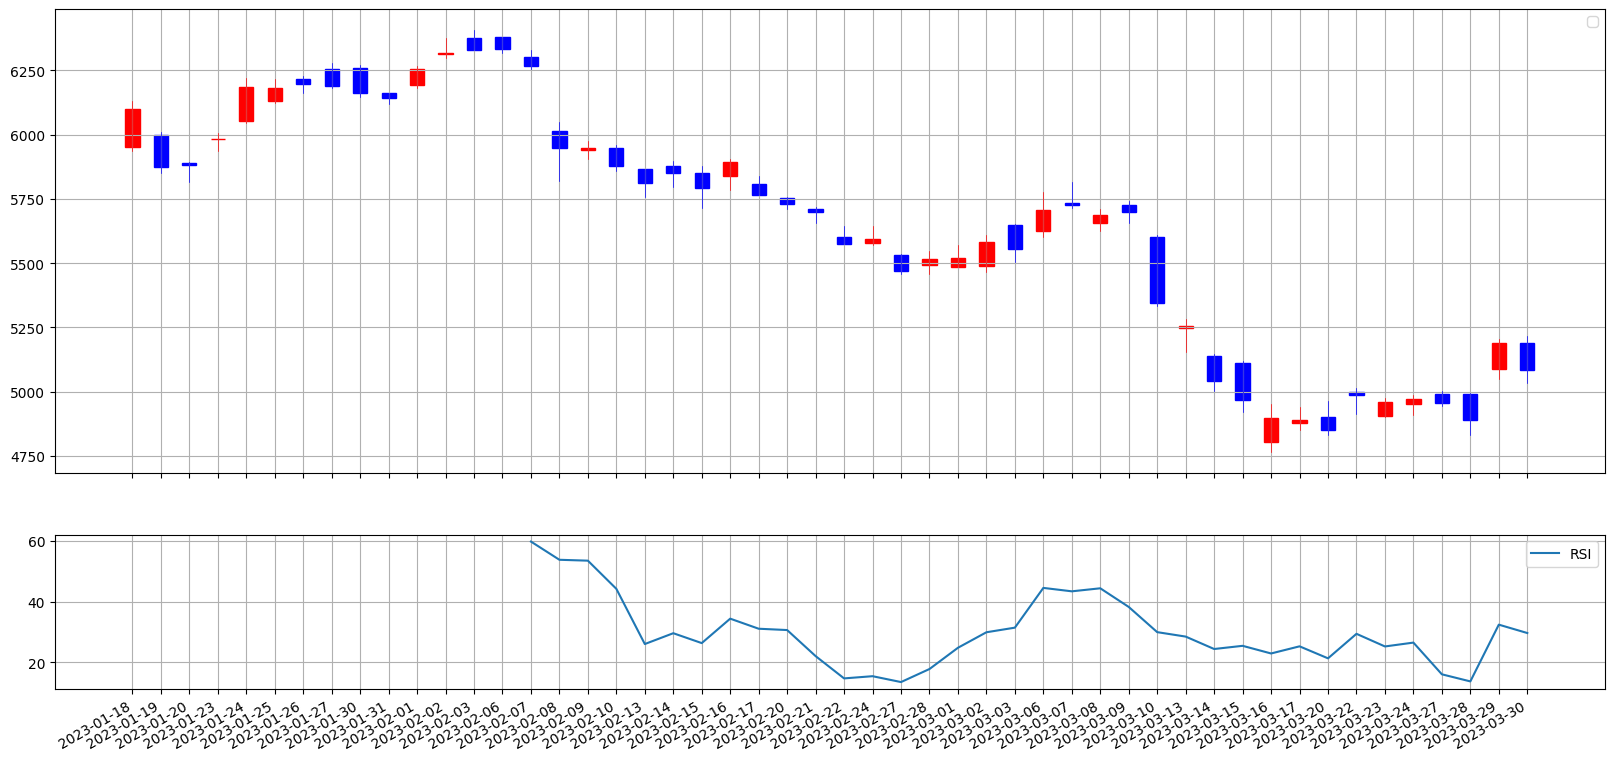

In [ ]:
import mpl_finance
import matplotlib.pyplot as plt
%matplotlib inline
 
 
# チャート定義
fig, ax = plt.subplots(2, figsize=(20, 10), sharex=True, gridspec_kw={'height_ratios': [3, 1]})
 
# ローソク足チャートをプロット
mpl_finance.candlestick_ohlc(ax[0], df.values, width=0.5, colorup='r', colordown='b')
 
# RSIをプロット
ax[1].plot(df["index"], df["RSI"], label="RSI")
 
# X軸を調整
plt.xticks([x for x in range(len(df))], [x.strftime('%Y-%m-%d') for x in df.index])
fig.autofmt_xdate()
 
# 凡例表示, グリッド表示
for a in ax:
    a.legend()
    a.grid()
 
# グラフを表示
plt.show()

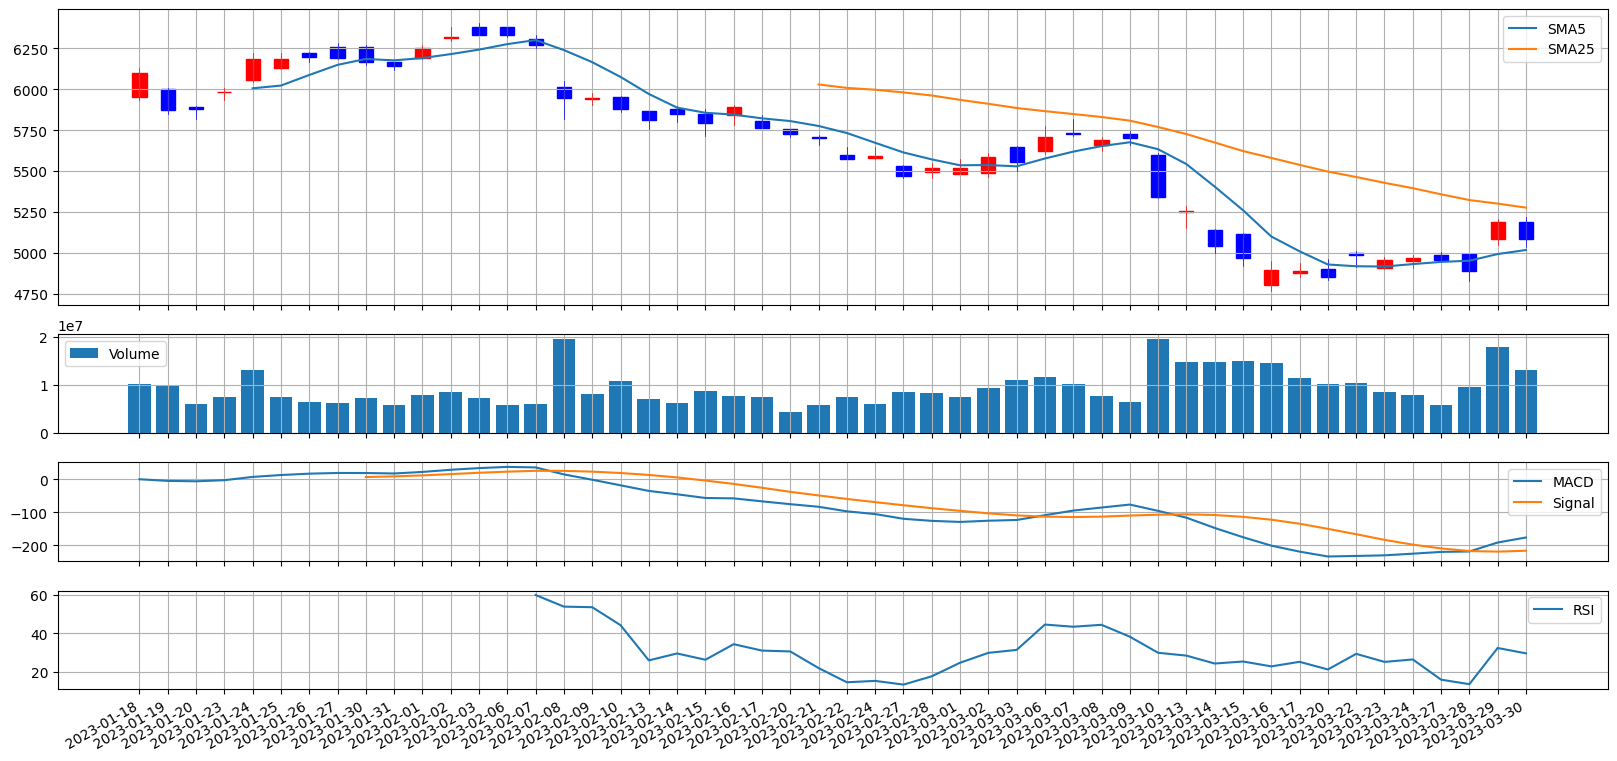

In [ ]:
import mpl_finance
import matplotlib.pyplot as plt
%matplotlib inline
 
 
# チャート定義
fig, ax = plt.subplots(4, figsize=(20, 10), sharex=True, gridspec_kw={'height_ratios': [3, 1, 1, 1]})
 
# ローソク足チャートをプロット
mpl_finance.candlestick_ohlc(ax[0], df.values, width=0.5, colorup='r', colordown='b')
 
# 移動平均線をプロット
ax[0].plot(df["index"], df["SMA5"], label="SMA5")
ax[0].plot(df["index"], df["SMA25"], label="SMA25")
 
# 出来高をプロット
ax[1].bar(df["index"], df["Volume"], label="Volume")
 
# MACDをプロット
ax[2].plot(df["index"], df["MACD"], label="MACD")
ax[2].plot(df["index"], df["Signal"], label="Signal")
 
# RSIをプロット
ax[3].plot(df["index"], df["RSI"], label="RSI")
 
# X軸を調整
plt.xticks([x for x in range(len(df))], [x.strftime('%Y-%m-%d') for x in df.index])
fig.autofmt_xdate()
 
# 凡例表示, グリッド表示
for a in ax:
    a.legend()
    a.grid()
 
# ローソク足チャートを表示
plt.show()